In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_product_dataset.csv')

In [3]:
df

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,2024-02-13,Baton Rouge
996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,2023-07-01,Worcester
997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,2023-10-29,Raleigh
998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,2023-10-28,Nashville


# Display basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [5]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


# Data Preprocessing
* Handle Missing values

In [6]:
df.fillna(method="ffill", inplace= True)

In [7]:
print("Missing values handled!")

Missing values handled!


* Encode categorical variables if any

In [8]:
if df.select_dtypes(include = "object").shape[1]>0:
    df=pd.get_dummies(df, drop_first= True)

* Feature and target selection

In [9]:
x = df.drop(columns=['Sales'])
y = df['Sales']

* Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train, x_test, y_train, y_test

(     ProductID   Price  Rating  NumReviews  StockQuantity  Discount  \
 29          30  469.00     1.6        4061            297      0.13   
 535        536  175.23     1.6        4166            268      0.20   
 695        696  175.28     4.8        4141            820      0.16   
 557        558  139.36     2.7         607            674      0.41   
 836        837  257.41     4.1        3865             24      0.06   
 ..         ...     ...     ...         ...            ...       ...   
 106        107  297.40     3.3        2472            612      0.18   
 270        271  205.66     1.6        1540            979      0.46   
 860        861  135.64     4.7        3815            246      0.40   
 435        436  190.67     2.5         891            454      0.38   
 102        103   82.39     1.5        1646            918      0.26   
 
      ProductName_Ankle Socks  ProductName_Art Print  \
 29                         0                      0   
 535                  

# Model Traning
* Initialize and train Models

In [12]:
models ={
    "Limnear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [13]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'\n {name} model trained !')


 Limnear Regression model trained !

 Random Forest model trained !


# Model Evaluation

In [14]:
results = {}
for name, model in models.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE":mse, "R2 Score": r2} # store result in the dictionary

In [15]:
results_df = pd.DataFrame(results).T

In [16]:
results_df

,MAE,MSE,R2 Score
Limnear Regression,3.041437e+08,4.590980e+18,-1.326746e+13
Random Forest,5.217594e+02,3.658359e+05,-5.722864e-02


# Visualizing Results
* Plot actual vs predicted sales for the best performing model

In [17]:
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(x_test)

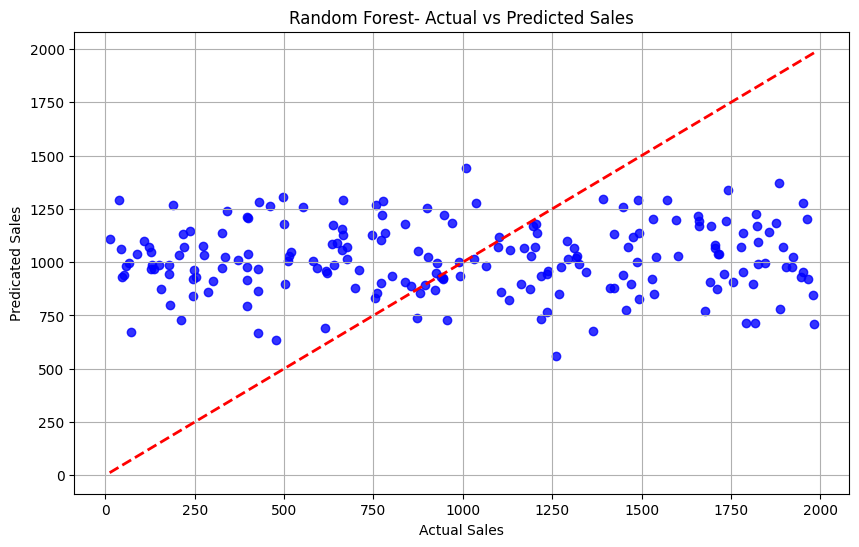

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, alpha=0.8, color='b')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r--', lw=2)
plt.title(f'{best_model_name}- Actual vs Predicted Sales')
plt.xlabel("Actual Sales")
plt.ylabel("Predicated Sales")
plt.grid()
plt.show()

# Save the Model for Future Predictions

In [19]:
import joblib

In [20]:
joblib.dump(best_model,'best_sales_model.pkl')

['best_sales_model.pkl']

In [21]:
print(f"\n{best_model_name} saved as 'best_sales_model.pkl'!")


Random Forest saved as 'best_sales_model.pkl'!
